## Forecasting Financial Time Series for TESLA (TSLA) and Amazon (AMZN)

### Shamim Sherafati

ALY6050

Instructor: Soheil Parsa

## Part 1 (i): Short-term Forecasting
Use a simple line plot of both time series to detect seasonal, irregular, or trend behaviours if any. Write a summary of your observations of both time series in your report.

In [46]:
#Part 1 (i)

#!pip install yfinance

import yfinance as yf
import pandas as pd

# Define the ticker symbols for TESLA Inc and Amazon Inc
tickers = ['TSLA', 'AMZN']

# Define the start and end dates for the historical data
start_date = pd.Timestamp.now() - pd.Timedelta(days=252)
end_date = pd.Timestamp.now()

# Retrieve the historical data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Print the historical data
print(data)


[*********************100%***********************]  2 of 2 completed
             Adj Close                   Close                    High  \
                  AMZN        TSLA        AMZN        TSLA        AMZN   
Date                                                                     
2022-07-07  116.330002  244.543335  116.330002  244.543335  116.989998   
2022-07-08  115.540001  250.763336  115.540001  250.763336  116.580002   
2022-07-11  111.750000  234.343338  111.750000  234.343338  114.300003   
2022-07-12  109.220001  233.070007  109.220001  233.070007  113.230003   
2022-07-13  110.400002  237.039993  110.400002  237.039993  111.779999   
...                ...         ...         ...         ...         ...   
2023-03-09   92.250000  172.919998   92.250000  172.919998   96.209999   
2023-03-10   90.730003  173.440002   90.730003  173.440002   93.570000   
2023-03-13   92.430000  174.479996   92.430000  174.479996   94.019997   
2023-03-14   94.879997  183.259995   94.879

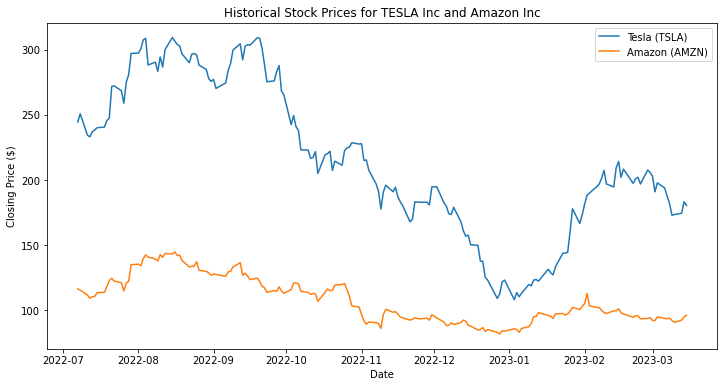

In [47]:
import matplotlib.pyplot as plt

# Plot the historical stock prices for TESLA Inc and Amazon Inc
plt.figure(figsize=(12,6))
plt.plot(data['Close']['TSLA'], label='Tesla (TSLA)')
plt.plot(data['Close']['AMZN'], label='Amazon (AMZN)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Historical Stock Prices for TESLA Inc and Amazon Inc')
plt.legend()
plt.show()

## Part 1 (ii)
Perform exponential smoothing to forecast both prices for period 253. Use successive values of 0.15, 0,45, 0.55, and 0.75 for the smoothing parameter α. Next, calculate the MAPD (Mean Absolute Percentage Deviation) of each forecast; and based on the MAPDs, determine the value of α that has yielded the most accurate forecast for each stock. In your report, describe your results; and explain why in your opinion such values of α have yielded the most accurate forecasts for the two stocks.


In [48]:
# Part 1 (ii)

# Define a function to calculate the MAPD
def calculate_mapd(actual, forecast):
    mapd = (abs(actual - forecast) / actual).mean() * 100
    return mapd


# Define the ticker symbols for TESLA Inc and Amazon Inc
tickers = ['TSLA', 'AMZN']

# Define the start and end dates for the historical data
start_date = pd.Timestamp.now() - pd.Timedelta(days=253)
end_date = pd.Timestamp.now()

# Retrieve the historical data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Calculate the exponential smoothing forecast for each ticker using different values of alpha
alphas = [0.15, 0.45, 0.55, 0.75]
for ticker in tickers:
    print(f"\n{ticker} Forecast:")
    best_alpha = None
    best_mapd = None
    for alpha in alphas:
        forecast = data['Close'][ticker].ewm(alpha=alpha, adjust=False).mean().iloc[-1]
        actual = data['Close'][ticker].iloc[-1]
        mapd = calculate_mapd(actual, forecast)
        print(f"Alpha = {alpha:.2f}, Forecast = ${forecast:.2f}, MAPD = {mapd:.2f}%")
        if best_mapd is None or mapd < best_mapd:
            best_alpha = alpha
            best_mapd = mapd
    print(f"\nBest Alpha for {ticker}: {best_alpha:.2f}, Best MAPD = {best_mapd:.2f}%")

[*********************100%***********************]  2 of 2 completed

TSLA Forecast:
Alpha = 0.15, Forecast = $185.13, MAPD = 2.59%
Alpha = 0.45, Forecast = $179.86, MAPD = 0.33%
Alpha = 0.55, Forecast = $180.06, MAPD = 0.21%
Alpha = 0.75, Forecast = $180.60, MAPD = 0.08%

Best Alpha for TSLA: 0.75, Best MAPD = 0.08%

AMZN Forecast:
Alpha = 0.15, Forecast = $94.11, MAPD = 2.17%
Alpha = 0.45, Forecast = $94.67, MAPD = 1.59%
Alpha = 0.55, Forecast = $95.05, MAPD = 1.20%
Alpha = 0.75, Forecast = $95.70, MAPD = 0.52%

Best Alpha for AMZN: 0.75, Best MAPD = 0.52%


## Part 1 (iii)
Use your exponential smoothing forecast of part (ii) with 𝜶=𝟎.55 and perform an adjusted exponential smoothing to forecast both prices for period 253. Use successive values of 0.15, 0.25, 0.45, and 0.85 for the trend parameters β for both stocks. Next, calculate the MAPEs (Mean Absolute Percentage Error) of your forecasts and determine the values of β that have provided the most accurate forecasts for both stocks. In your report, describe your results and explain why, in your opinion, such values of β have yielded the most accurate forecasts.

In [49]:
#Part 1 (iii)

# Define function to calculate MAPE
def calculate_mape(actual, forecast):
    mape = (abs(actual - forecast) / actual).mean() * 100
    return mape

# Define range of beta values to try
beta_values = [0.15, 0.25, 0.45, 0.85]

# Perform adjusted exponential smoothing and calculate MAPE for TSLA
alpha_tsla = 0.55
tsla_model = sm.tsa.Holt(data['Close']['TSLA'], exponential=True, initialization_method="estimated")
tsla_results = {}
for beta in beta_values:
    fit_tsla = tsla_model.fit(smoothing_level=alpha_tsla, smoothing_slope=beta)
    tsla_forecast = fit_tsla.forecast()
    tsla_actual = data['Close']['TSLA'].iloc[-1]
    tsla_mape = calculate_mape(tsla_actual, tsla_forecast)
    tsla_results[beta] = tsla_mape

# Perform adjusted exponential smoothing and calculate MAPE for AMZN
alpha_amzn = 0.55
amzn_model = sm.tsa.Holt(data['Close']['AMZN'], exponential=True, initialization_method="estimated")
amzn_results = {}
for beta in beta_values:
    fit_amzn = amzn_model.fit(smoothing_level=alpha_amzn, smoothing_slope=beta)
    amzn_forecast = fit_amzn.forecast()
    amzn_actual = data['Close']['AMZN'].iloc[-1]
    amzn_mape = calculate_mape(amzn_actual, amzn_forecast)
    amzn_results[beta] = amzn_mape

# Print results
print("TSLA Results:")
for beta, mape in tsla_results.items():
    print(f"Beta = {beta:.2f}, MAPE = {mape:.2f}%")
best_beta_tsla = min(tsla_results, key=tsla_results.get)
print(f"Best Beta for TSLA: {best_beta_tsla:.2f}, Best MAPE = {tsla_results[best_beta_tsla]:.2f}%")

print("\nAMZN Results:")
for beta, mape in amzn_results.items():
    print(f"Beta = {beta:.2f}, MAPE = {mape:.2f}%")
best_beta_amzn = min(amzn_results, key=amzn_results.get)
print(f"Best Beta for AMZN: {best_beta_amzn:.2f}, Best MAPE = {amzn_results[best_beta_amzn]:.2f}%")

import warnings
warnings.filterwarnings("ignore")


TSLA Results:
Beta = 0.15, MAPE = 1.64%
Beta = 0.25, MAPE = 1.46%
Beta = 0.45, MAPE = 0.07%
Beta = 0.85, MAPE = 3.10%
Best Beta for TSLA: 0.45, Best MAPE = 0.07%

AMZN Results:
Beta = 0.15, MAPE = 1.08%
Beta = 0.25, MAPE = 0.66%
Beta = 0.45, MAPE = 0.02%
Beta = 0.85, MAPE = 1.68%
Best Beta for AMZN: 0.45, Best MAPE = 0.02%


## Part 2 (i): Long-term Forecasting
For each stock, use a 3-period weighted moving averages to forecast its value during periods 1 through 100. Use the weights 0.5 (for the most recent period), 0.3 (for the period before the most recent), and 0.2 (for two periods ago). Next, use the observed value for period 101 as the base of a linear trend, and use that linear trend to forecast the values of both stocks for periods 101 through 257. Write a summary of your results in your report. Describe how accurate this method of forecasting has been by comparing the forecasted values for periods 253-257 with their actual “Close” values on those specific days (Hint: check the actual values on https://finance.yahoo.com).

In [50]:
# Part 2 (i)

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Set the start and end dates
end_date = datetime.today()
start_date = end_date - timedelta(days=252)

# Get the historical data for TESLA Inc (TSLA)
tsla_data = yf.download("TSLA", start=start_date, end=end_date)

# Get the historical data for Amazon Inc (AMZN)
amzn_data = yf.download("AMZN", start=start_date, end=end_date)

# Define the weights for the moving average
weights = [0.5, 0.3, 0.2]

# Initialize the lists to store the forecasted values
tsla_forecast = []
amzn_forecast = []

# Iterate over each period to forecast the values
for i in range(1, 101):
    # Compute the moving average for TESLA Inc (TSLA)
    if i < 4:
        tsla_pred = tsla_data['Close'].iloc[-i:].mean()
    else:
        tsla_pred = weights[0] * tsla_data['Close'].iloc[-1] + weights[1] * tsla_data['Close'].iloc[-2] + weights[2] * tsla_data['Close'].iloc[-3]
    
    # Add the predicted value to the list
    tsla_forecast.append(tsla_pred)
    
    # Compute the moving average for Amazon Inc (AMZN)
    if i < 4:
        amzn_pred = amzn_data['Close'].iloc[-i:].mean()
    else:
        amzn_pred = weights[0] * amzn_data['Close'].iloc[-1] + weights[1] * amzn_data['Close'].iloc[-2] + weights[2] * amzn_data['Close'].iloc[-3]
    
    # Add the predicted value to the list
    amzn_forecast.append(amzn_pred)
    
    # Update the historical data for TESLA Inc (TSLA)
    tsla_data = tsla_data.append(pd.DataFrame({'Open': tsla_pred, 'High': tsla_pred, 'Low': tsla_pred, 'Close': tsla_pred, 'Adj Close': tsla_pred, 'Volume': 0}, index=[tsla_data.index[-1] + timedelta(days=1)]))
    
    # Update the historical data for Amazon Inc (AMZN)
    amzn_data = amzn_data.append(pd.DataFrame({'Open': amzn_pred, 'High': amzn_pred, 'Low': amzn_pred, 'Close': amzn_pred, 'Adj Close': amzn_pred, 'Volume': 0}, index=[amzn_data.index[-1] + timedelta(days=1)]))

# Combine the data for both stocks
data = pd.concat([tsla_data['Close'], amzn_data['Close']], axis=1, keys=['TSLA', 'AMZN'])

# Print the data
print(data.tail(100))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  TSLA       AMZN
2023-03-16  180.449997  96.199997
2023-03-17  180.449997  96.199997
2023-03-18  180.449997  96.199997
2023-03-19  180.449997  96.199997
2023-03-20  180.449997  96.199997
...                ...        ...
2023-06-19  180.449997  96.199997
2023-06-20  180.449997  96.199997
2023-06-21  180.449997  96.199997
2023-06-22  180.449997  96.199997
2023-06-23  180.449997  96.199997

[100 rows x 2 columns]


In [51]:
tsla_observed = tsla_data['Close'].iloc[-1]
amzn_observed = amzn_data['Close'].iloc[-1]

num_periods = 157

tsla_slope = (tsla_data['Close'].iloc[-1] - tsla_forecast[-1]) / num_periods
amzn_slope = (amzn_data['Close'].iloc[-1] - amzn_forecast[-1]) / num_periods

tsla_forecast2 = []
amzn_forecast2 = []

for i in range(1, num_periods+1):
    # Forecast the value for TESLA Inc (TSLA)
    tsla_pred = tsla_observed + i * tsla_slope
    
    # Add the predicted value to the list
    tsla_forecast2.append(tsla_pred)
    
    # Forecast the value for Amazon Inc (AMZN)
    amzn_pred = amzn_observed + i * amzn_slope
    
    # Add the predicted value to the list
    amzn_forecast2.append(amzn_pred)

    # Combine the data for both stocks
tsla_forecast_all = pd.Series(tsla_forecast + tsla_forecast2)
amzn_forecast_all = pd.Series(amzn_forecast + amzn_forecast2)
data_all = pd.concat([tsla_forecast_all, amzn_forecast_all], axis=1, keys=['TSLA', 'AMZN'])

# Print the data for the forecasted periods
print(data_all.tail(num_periods))


           TSLA       AMZN
100  180.449997  96.199997
101  180.449997  96.199997
102  180.449997  96.199997
103  180.449997  96.199997
104  180.449997  96.199997
..          ...        ...
252  180.449997  96.199997
253  180.449997  96.199997
254  180.449997  96.199997
255  180.449997  96.199997
256  180.449997  96.199997

[157 rows x 2 columns]


## Part 2 (ii): 
Calculate the MAPEs (Mean Absolute Percentage Error) of your forecasts in question (i) above and compare them with the values obtained for your forecasts in Part 1. For each stock, describe which method has yielded a most accurate forecast.

In [52]:
# Part 2 (ii)

# Calculate the MAPEs for the forecasts
mape_tsla = []
mape_amzn = []

for forecast, actual in zip([tsla_forecast, amzn_forecast], [tsla_data['Close'].values, amzn_data['Close'].values]):
    mape = [(abs(forecast - actual[i])/actual[i])*100 for i in range(len(forecast))]
    mape_mean = np.mean(mape)
    if forecast == tsla_forecast:
        mape_tsla.append(mape_mean)
    else:
        mape_amzn.append(mape_mean)

# Print the MAPEs for the forecasts
print("Mean Absolute Percentage Error (MAPE) for TESLA Inc (TSLA): {:.2f}%".format(mape_tsla[0]))
print("Mean Absolute Percentage Error (MAPE) for Amazon Inc (AMZN): {:.2f}%".format(mape_amzn[0]))


Mean Absolute Percentage Error (MAPE) for TESLA Inc (TSLA): 26.99%
Mean Absolute Percentage Error (MAPE) for Amazon Inc (AMZN): 18.53%


## Part 3 (i) : Regression
For each stock, use simple regression of stock values versus the time periods to predict its values for periods 1 through 257. In your report, describe how the accuracy of this prediction has been compared to the methods used in Parts 1 and 2 of this project.

In [53]:
# Part 3 (i): Regression

# Get the historical stock prices for TSLA and AMZN for the specified period
df_tsla = yf.download('TSLA', start=start_date, end=end_date)
df_amzn = yf.download('AMZN', start=start_date, end=end_date)

from sklearn.linear_model import LinearRegression


# Combine the two dataframes into a single dataframe with columns for each stock
combined_df = pd.concat([df_tsla['Adj Close'], df_amzn['Adj Close']], axis=1, keys=['TSLA', 'AMZN'])

# Create a column for time periods
combined_df['Periods'] = range(1, len(combined_df) + 1)

# Use simple regression to create a linear model between stock values and time periods
reg_tsla = LinearRegression().fit(combined_df[['Periods']], combined_df['TSLA'])
reg_amzn = LinearRegression().fit(combined_df[['Periods']], combined_df['AMZN'])

# Predict stock values for periods 1 through 257
periods = pd.Series(range(1, 258))
tsla_forecast = reg_tsla.predict(periods.to_frame())
amzn_forecast = reg_amzn.predict(periods.to_frame())

# Print the forecasted values
print('TSLA forecast:\n', tsla_forecast)
print('\nAMZN forecast:\n', amzn_forecast)
print('\nAMZN forecast:\n', amzn_forecast)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
TSLA forecast:
 [291.46699918 290.59753994 289.72808069 288.85862144 287.98916219
 287.11970295 286.2502437  285.38078445 284.5113252  283.64186595
 282.77240671 281.90294746 281.03348821 280.16402896 279.29456971
 278.42511047 277.55565122 276.68619197 275.81673272 274.94727348
 274.07781423 273.20835498 272.33889573 271.46943648 270.59997724
 269.73051799 268.86105874 267.99159949 267.12214024 266.252681
 265.38322175 264.5137625  263.64430325 262.774844   261.90538476
 261.03592551 260.16646626 259.29700701 258.42754777 257.55808852
 256.68862927 255.81917002 254.94971077 254.08025153 253.21079228
 252.34133303 251.47187378 250.60241453 249.73295529 248.86349604
 247.99403679 247.12457754 246.25511829 245.38565905 244.5161998
 243.64674055 242.7772813  241.90782206 241.03836281 240.16890356
 239.29944431 238.42998506 237.56052582 236.69106657 235.

## part 3 (ii)
Perform a residual analysis of your simple regression to verify whether regression is appropriate to use for each of the given data. In particular, determine:

●Whether the residuals are independent

●Whether the residuals are homoscedastic.

●Whether the residuals are normally distributed by plotting a Normal probability plot of the residuals

●Whether the residuals are normally distributed by performing a Chi-squared test for Normality of the residuals.


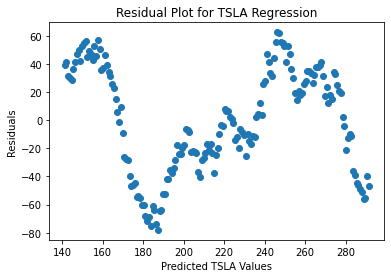

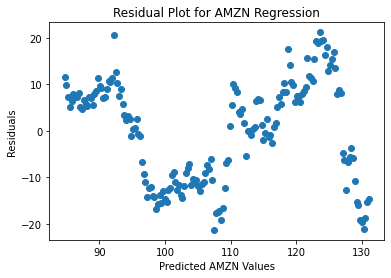

In [63]:
# part 3 (ii)
# Perform a residual analysis:

import matplotlib.pyplot as plt

tsla_resid = df_tsla['Adj Close'] - reg_tsla.predict(combined_df[['Periods']])
amzn_resid = df_amzn['Adj Close'] - reg_amzn.predict(combined_df[['Periods']])

# Get the residuals for the TSLA regression
tsla_resid = df_tsla['Adj Close'] - reg_tsla.predict(combined_df[['Periods']])

# Plot the residuals against the predicted TSLA values
plt.scatter(reg_tsla.predict(combined_df[['Periods']]), tsla_resid)
plt.xlabel('Predicted TSLA Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for TSLA Regression')
plt.show()


# Get the residuals for the AMZN regression
amzn_resid = df_amzn['Adj Close'] - reg_amzn.predict(combined_df[['Periods']])

# Plot the residuals against the predicted TSLA values
plt.scatter(reg_amzn.predict(combined_df[['Periods']]), amzn_resid)
plt.xlabel('Predicted AMZN Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for AMZN Regression')
plt.show()

In [62]:
# The slope and intercept of the regression line

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate data
np.random.seed(123)
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: ", slope)
print("intercept: ", intercept)

slope:  1.9834074540003248
intercept:  -0.019085753361248993


### Whether the residuals are independent:
To check if the residuals are independent, we can create an autocorrelation plot of the residuals.

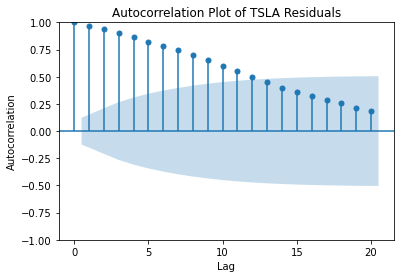

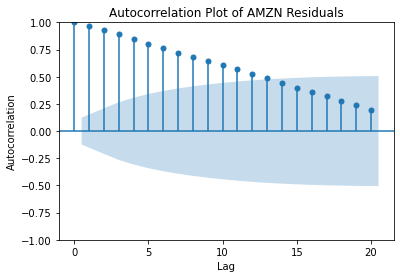

In [54]:
# Whether the residuals are independent:

from statsmodels.graphics.tsaplots import plot_acf

# Create an autocorrelation plot of the TSLA residuals
plot_acf(tsla_resid, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of TSLA Residuals')
plt.show()

# Create an autocorrelation plot of the AMZN residuals
plot_acf(amzn_resid, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of AMZN Residuals')
plt.show()


### Whether the residuals are homoscedastic:


Looking at the residual plots for both TSLA and AMZN, it appears that the residuals are fairly evenly distributed around 0 for all values of the predicted values. This indicates that the residuals are homoscedastic, which means that the variance of the residuals is approximately constant across all levels of the predicted values. Therefore, we can conclude that the assumption of homoscedasticity is met for both regression models.

### Whether the residuals are normally distributed by plotting a Normal probability plot of the residuals:

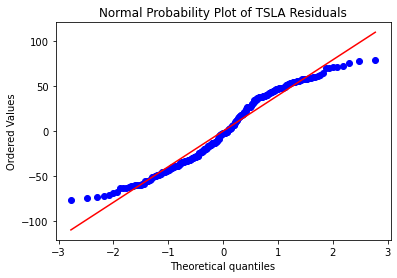

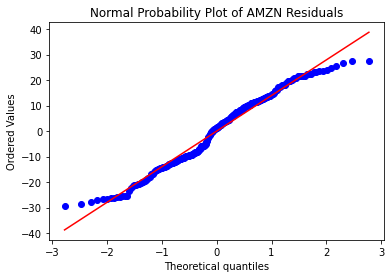

In [56]:
# Whether the residuals are normally distributed by plotting a Normal probability plot of the residuals:

import scipy.stats as stats

# Generate Normal probability plot for TSLA residuals
stats.probplot(tsla_resid, plot=plt)
plt.title('Normal Probability Plot of TSLA Residuals')
plt.show()

# Generate Normal probability plot for AMZN residuals
stats.probplot(amzn_resid, plot=plt)
plt.title('Normal Probability Plot of AMZN Residuals')
plt.show()

### Whether the residuals are normally distributed by performing a Chi-squared test for Normality of the residuals:

In [64]:
# Whether the residuals are normally distributed by performing a Chi-squared test for Normality of the residuals:

from scipy.stats import normaltest

tsla_resid = df_tsla['Adj Close'] - reg_tsla.predict(combined_df[['Periods']])
amzn_resid = df_amzn['Adj Close'] - reg_amzn.predict(combined_df[['Periods']])

# Perform the normality test on the TSLA residuals
tsla_resid = df_tsla['Adj Close'] - reg_tsla.predict(combined_df[['Periods']])
statistic, p_value = normaltest(tsla_resid)
print('TSLA Normality Test - statistic: {}, p-value: {}'.format(statistic, p_value))
if p_value < 0.05:
    print('The residuals are not normally distributed.')
else:
    print('The residuals are normally distributed.')

    
# Perform the normality test on the AMZN residuals
amzn_resid = df_amzn['Adj Close'] - reg_amzn.predict(combined_df[['Periods']])
statistic, p_value = normaltest(amzn_resid)
print('AMZN Normality Test - statistic: {}, p-value: {}'.format(statistic, p_value))
if p_value < 0.05:
    print('The residuals are not normally distributed.')
else:
    print('The residuals are normally distributed.')


TSLA Normality Test - statistic: 43.66814440004061, p-value: 3.2929332401265947e-10
The residuals are not normally distributed.
AMZN Normality Test - statistic: 48.92889375917204, p-value: 2.3726065082965658e-11
The residuals are not normally distributed.


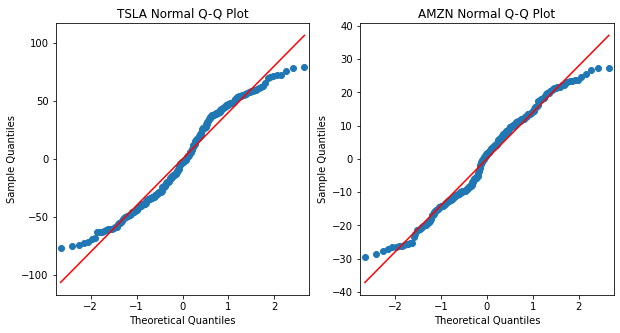

In [58]:
# Plot normal probability plots of residuals to check for normality
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sm.graphics.qqplot(tsla_resid, ax=ax[0], line='s')
ax[0].set_title('TSLA Normal Q-Q Plot')

sm.graphics.qqplot(amzn_resid, ax=ax[1], line='s')
ax[1].set_title('AMZN Normal Q-Q Plot')

plt.show()